# Serialization of models and dataset
You may have already seen some examples of how to save and load QSPRpred models and datasets in other tutorials.
In this tutorial, we will go through the serialization of models and datasets in some more detail.
As well as saving and loading models and datasets, we will also cover what is contained in the saved files and how to use them.


## Dataset
First, we will create a simple `QSPRDataset` from our tutorial dataset tsv file.

In [1]:
# Load a dataset from a table file
import os

from IPython.display import display

from qsprpred.data import QSPRDataset

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = QSPRDataset.fromTableFile(
    filename="../../tutorial_data/A2A_LIGANDS.tsv",
    path="../../tutorial_output/data",
    name="SerializationTutorialDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "regression"}],
)
dataset.randomState = 42

display(dataset.getDF())

,SMILES,pchembl_value_Mean,Year,original_smiles,ID,ID_before_change,pchembl_value_Mean_original,Split_IsTrain,Split_Index
ID,,,,,,,,,
SerializationTutorialDataset_storage_library_0000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,SerializationTutorialDataset_storage_library_0000,SerializationTutorialDataset_storage_library_0000,8.68,True,0
SerializationTutorialDataset_storage_library_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,SerializationTutorialDataset_storage_library_0001,SerializationTutorialDataset_storage_library_0001,4.82,True,1
SerializationTutorialDataset_storage_library_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,SerializationTutorialDataset_storage_library_0002,SerializationTutorialDataset_storage_library_0002,5.65,True,2
SerializationTutorialDataset_storage_library_0003,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,SerializationTutorialDataset_storage_library_0003,SerializationTutorialDataset_storage_library_0003,5.45,True,3
SerializationTutorialDataset_storage_library_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,SerializationTutorialDataset_storage_library_0004,SerializationTutorialDataset_storage_library_0004,5.20,True,4
...,...,...,...,...,...,...,...,...,...
SerializationTutorialDataset_storage_library_4077,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,7.09,2018.0,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,SerializationTutorialDataset_storage_library_4077,SerializationTutorialDataset_storage_library_4077,7.09,True,4077
SerializationTutorialDataset_storage_library_4078,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,8.22,2008.0,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,SerializationTutorialDataset_storage_library_4078,SerializationTutorialDataset_storage_library_4078,8.22,True,4078
SerializationTutorialDataset_storage_library_4079,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,4.89,2010.0,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,SerializationTutorialDataset_storage_library_4079,SerializationTutorialDataset_storage_library_4079,4.89,True,4079


Even though we specified the folder and dataset name, the dataset is not saved to disk until we call the `save` method.

In [2]:
dataset.save()

Now you will notice that a new folder has been created in the specified directory called `SerializationTutorialDataset`.
This folder contains the dataset file `SerializationTutorialDataset_df.pkl` and the metadata file `SerializationTutorialDataset_meta.json`.
The dataset file is a pickle file that contains the dataset as a pandas DataFrame, which we showed above with `getDF()`.
The metadata file is a json file that contains the metadata of the dataset, such as the dataset name, index columns and target properties.

Next, we will add some descriptors to the dataset and save it to disk again.

In [3]:
from qsprpred.data.descriptors.fingerprints import MorganFP

dataset.addDescriptors([MorganFP(radius=3, nBits=2048)])

dataset.save()

qsprpred - WARNING - Molecular descriptors already exist in SerializationTutorialDataset. Calculation will be skipped. Use `recalculate=True` to overwrite them.


Now you can see that the dataset folder contains an additional folder called `Descriptors_SerializationTutorialDataset_MorganFP` which contains the descriptor files.
The descriptors are again saved as a pickle file and metadata file:
- `Descriptors_SerializationTutorialDataset_MorganFP_df.pkl` contains the descriptors as a pandas DataFrame.
- `Descriptors_SerializationTutorialDataset_MorganFP_meta.json` contains the metadata of the descriptors, such as the descriptor name and type.

If we were to add more descriptors to the dataset, they would be saved in the same way in a new folder with the descriptor name.

There is two ways to reload the dataset from disk:

The first one is call the fromFile method on the metadata file of the QSPRDataset class:

In [4]:
dataset = QSPRDataset.fromFile(
    "../../tutorial_output/data/SerializationTutorialDataset/meta.json")

dataset.getDF().head()

,SMILES,pchembl_value_Mean,Year,original_smiles,ID,ID_before_change,pchembl_value_Mean_original,Split_IsTrain,Split_Index
ID,,,,,,,,,
SerializationTutorialDataset_storage_library_0000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,SerializationTutorialDataset_storage_library_0000,SerializationTutorialDataset_storage_library_0000,8.68,True,0
SerializationTutorialDataset_storage_library_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,SerializationTutorialDataset_storage_library_0001,SerializationTutorialDataset_storage_library_0001,4.82,True,1
SerializationTutorialDataset_storage_library_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,SerializationTutorialDataset_storage_library_0002,SerializationTutorialDataset_storage_library_0002,5.65,True,2
SerializationTutorialDataset_storage_library_0003,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,SerializationTutorialDataset_storage_library_0003,SerializationTutorialDataset_storage_library_0003,5.45,True,3
SerializationTutorialDataset_storage_library_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,SerializationTutorialDataset_storage_library_0004,SerializationTutorialDataset_storage_library_0004,5.20,True,4


The second one is to create a new `QSPRDataset` object with the same name and folder as the dataset that we want to load.

In [5]:
dataset = QSPRDataset(
    name="SerializationTutorialDataset",
    path="../../tutorial_output/data/",
)

dataset.getDF().head()

,SMILES,pchembl_value_Mean,Year,original_smiles,ID,ID_before_change,pchembl_value_Mean_original,Split_IsTrain,Split_Index
ID,,,,,,,,,
SerializationTutorialDataset_storage_library_0000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,SerializationTutorialDataset_storage_library_0000,SerializationTutorialDataset_storage_library_0000,8.68,True,0
SerializationTutorialDataset_storage_library_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,SerializationTutorialDataset_storage_library_0001,SerializationTutorialDataset_storage_library_0001,4.82,True,1
SerializationTutorialDataset_storage_library_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,SerializationTutorialDataset_storage_library_0002,SerializationTutorialDataset_storage_library_0002,5.65,True,2
SerializationTutorialDataset_storage_library_0003,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,SerializationTutorialDataset_storage_library_0003,SerializationTutorialDataset_storage_library_0003,5.45,True,3
SerializationTutorialDataset_storage_library_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,SerializationTutorialDataset_storage_library_0004,SerializationTutorialDataset_storage_library_0004,5.20,True,4


It is also possible to save the dataset as a tsv file, by specifing the `store_format` parameter as 'csv'.

In [6]:
# Load a dataset from a table file
import os

from IPython.display import display

from qsprpred.data import QSPRDataset

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = QSPRDataset.fromTableFile(
    filename="../../tutorial_data/A2A_LIGANDS.tsv",
    path="../../tutorial_output/data",
    name="SerializationTutorialDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    store_format="csv"
)
dataset.randomState = 42
dataset.clear()  # clear the previously saved states

display(dataset.getDF().head())

,SMILES,pchembl_value_Mean,Year,original_smiles,ID,ID_before_change,pchembl_value_Mean_original,Split_IsTrain,Split_Index
ID,,,,,,,,,
SerializationTutorialDataset_storage_library_0000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,SerializationTutorialDataset_storage_library_0000,SerializationTutorialDataset_storage_library_0000,8.68,True,0
SerializationTutorialDataset_storage_library_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,SerializationTutorialDataset_storage_library_0001,SerializationTutorialDataset_storage_library_0001,4.82,True,1
SerializationTutorialDataset_storage_library_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,SerializationTutorialDataset_storage_library_0002,SerializationTutorialDataset_storage_library_0002,5.65,True,2
SerializationTutorialDataset_storage_library_0003,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,SerializationTutorialDataset_storage_library_0003,SerializationTutorialDataset_storage_library_0003,5.45,True,3
SerializationTutorialDataset_storage_library_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,SerializationTutorialDataset_storage_library_0004,SerializationTutorialDataset_storage_library_0004,5.20,True,4


Here we also specified the `overwrite = True` parameter, which will overwrite the existing dataset file if it already exists.
Notice. that the dataset folder has now been deleted, but no new folder has been created yet.
This is because the dataset is not saved to disk until we call the `save` method.

After we have added a descriptor set and save again, you can see that the dataset file has now been saved as a csv file.
Moreover, the descriptor folder has been created and contains the descriptor file now also saved as a csv file.


In [7]:
dataset.addDescriptors([MorganFP(radius=3, nBits=2048)])

dataset.save()

qsprpred - WARNING - Molecular descriptors already exist in SerializationTutorialDataset. Calculation will be skipped. Use `recalculate=True` to overwrite them.


## Models

Now we will create a simple `QSPRModel` from the tutorial dataset. This
time we notice the output folder has been created before we call the `save` method.
However, the folder is still empty.

In [8]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor

os.makedirs("../../tutorial_output/models", exist_ok=True)

model = SklearnModel(
    base_dir="../../tutorial_output/models",
    alg=KNeighborsRegressor,
    name="SerializationTutorialModel"
)

If we now call the `save` method, the model will be saved to disk.
The model folder contains the model file `SerializationTutorialModel.json` and the metadata file `SerializationTutorialModel_meta.json`.
The model file is a json file that contains the unfitted sci-kit learn model as a dictionary.
This json file is created with the [ml2json](https://github.com/OlivierBeq/ml2json).
Non scikit-learn type models can be saved as different file types, such as models described in the [deep learning models tutorial](../../advanced/modelling/deep_learning_models.ipynb) or the [chemprop models tutorial](../../advanced/modelling/chemprop_models.ipynb) which will be saved as a pickle file.

In [9]:
model.save()

'/home/sichom/projects/QSPRpred/tutorials/tutorial_output/models/SerializationTutorialModel/SerializationTutorialModel_meta.json'

If we then run cross-validation and train on the whole dataset making predictions for the independent test set, this will add
two tsv files to the model folder:
- `SerializationTutorialModel.cv.tsv` contains the cross-validation predictions.
- `SerializationTutorialModel.ind.tsv` contains the independent test set predictions.

In [10]:
from qsprpred.data import RandomSplit
from qsprpred.models import CrossValAssessor, TestSetAssessor

# Split the dataset into training and test sets
dataset.split(RandomSplit(test_fraction=0.2, seed=42))

# We can now assess the model performance on the training set using cross validation
CrossValAssessor("r2")(model, dataset)

# and on the test set
TestSetAssessor("r2")(model, dataset)


qsprpred - WARNING - Random state supplied, but alg <class 'sklearn.neighbors._regression.KNeighborsRegressor'> does not support it. Ignoring this setting.


array([0.6306765])

These files are used by the plotting methods of the `QSPRModel` class to plot the predictions.
However, you can also use these files to plot the predictions yourself.

,ID,pchembl_value_Mean_Label,pchembl_value_Mean_Prediction,Fold
0,SerializationTutorialDataset_storage_library_0221,7.20,7.610,0.0
1,SerializationTutorialDataset_storage_library_3260,6.02,6.078,0.0
2,SerializationTutorialDataset_storage_library_3675,8.32,8.116,0.0
3,SerializationTutorialDataset_storage_library_3330,8.02,7.055,0.0
4,SerializationTutorialDataset_storage_library_3484,6.77,7.636,0.0


<Axes: xlabel='pchembl_value_Mean_Label', ylabel='pchembl_value_Mean_Prediction'>

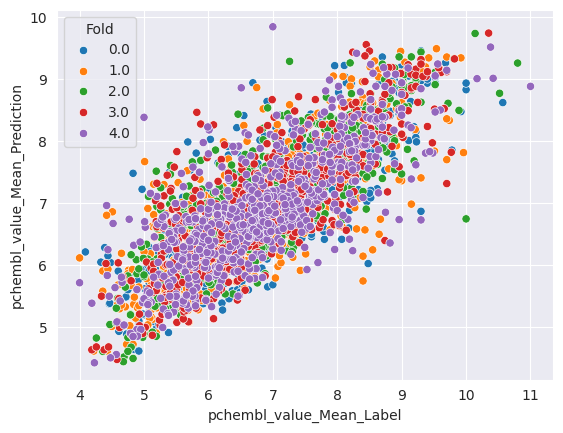

In [11]:
import pandas as pd

df_cv = pd.read_csv(
    "../../tutorial_output/models/SerializationTutorialModel/SerializationTutorialModel.cv.tsv",
    sep="\t")

display(df_cv.head())

import seaborn as sns

sns.scatterplot(data=df_cv, x="pchembl_value_Mean_Label",
                y="pchembl_value_Mean_Prediction", hue=df_cv.Fold.astype(str))

One thing to note is that if we now have a look at the model file (`SerializationTutorialModel.json`), we can see that the model is not yet fitted.
By default the `estimator`, which is the underlying scikit-learn model, is not saved to the model file until you call the `fitDataset` method, which fits the whole (including the independent test set) dataset to the model. If you do want to have access to the estimators fitted during cross-validation and test set analysis, you can use monitors as described in the [monitoring tutorial](../../advanced/modelling/monitoring.ipynb).

In [12]:
model.fitDataset(dataset)

'/home/sichom/projects/QSPRpred/tutorials/tutorial_output/models/SerializationTutorialModel/SerializationTutorialModel_meta.json'